<a href="https://colab.research.google.com/github/DRA-chaos/ECS-323-Control-Systems/blob/main/Animation_of_Mass_Spring_Damper_System_D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We need to create the animation for the following system
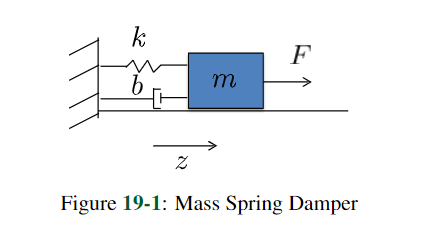

	m = 4.922Kg, k = 2.989N/m, b = 0.495N-s/m are the parameters assigned to me

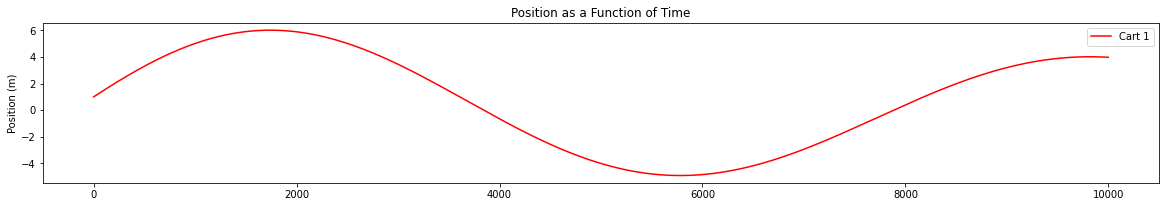

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import time

#t0 = time.clock()  # start timer for finding simulation time

# Problem parameters
k1 = 2.989  #  spring constant (N/m)

b1 = 0.495  #  viscous damping coefficient (kg/s)

m1 = 4.922  #  mass (kg)

x10 = 1  #  initial position (m)

v10 = 5  #  initial velocity (m/s)

# Time step
simTime = 10  # simulation time (s)
tStep = 0.001  # simulation time step
iterations = int(simTime / tStep)  # total number of iterations
t = np.arange(0, iterations)

# We add initial conditions and also allocate variables for speed
x1 = np.zeros((iterations, 1))
x1[0, :] = x10

v1 = np.zeros((iterations, 1))
v1[0, :] = v10

a1 = np.zeros((iterations, 1))
a1[0, :] = -(b1 * v10  + k1 * x10 ) / m1

# Solve the ODE's with Euler's Method
for n in range(1, iterations):
    x1[n, :] = x1[n - 1, :] + v1[n - 1, :] * tStep  # cart 1 position

    v1[n, :] = v1[n - 1, :] + a1[n - 1, :] * tStep  # cart 1 velocity

    # Find mass accelerations
    a1[n, :] = -(b1 * v1[n, :]  + k1 * x1[n, :] ) / m1

# Plot results
plt.rcParams["figure.figsize"] = (20, 10)  # resizes figures for viewing
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, x1, 'r', label='Cart 1')

plt.ylabel('Position (m)')
plt.title('Position as a Function of Time')
plt.legend()
#plt.subplot(3, 1, 2)
#plt.plot(t, v1, 'b', label='Spring Mass Damper System')

Plotting both input variable 'z' and its derivative as well

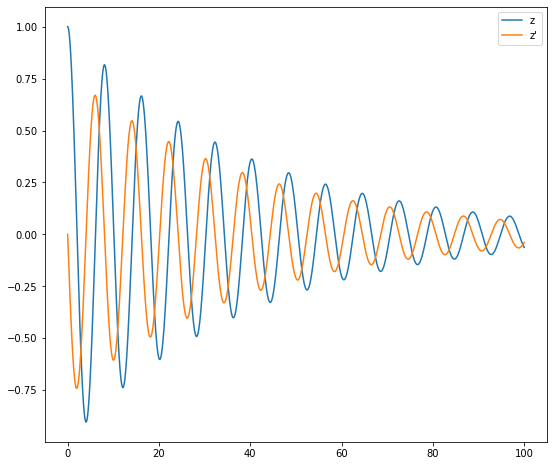

In [13]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

mass = 4.922 # kg
kspring = 2.989  # N/m
cviscous = 0.495  # N s/m


eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)


def calc_deri(zvec, time, eps, omega):
    return (zvec[1], -eps * omega * zvec[1] - omega **2 * zvec[0])

time_vec = np.linspace(0, 100, 10000)
zinit = (1, 0)
zarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

plt.figure(figsize=(9, 8))
plt.plot(time_vec, zarr[:, 0], label='z')
plt.plot(time_vec, zarr[:, 1], label="z'")
plt.legend(loc='best')
plt.show()